<a href="https://colab.research.google.com/github/lluk4z/IF697-CienciaDeDados/blob/main/Projeto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import sklearn

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data (1).csv


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['owid-covid-data.csv'].decode('utf-8')))

In [101]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,hdi_category,stringency_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia


In [ ]:
#Dimensões do data frame
df.shape

(74141, 60)

# **Análise descritiva dos dados**

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.819200e+04,98189.000000,97179.000000,8.798300e+04,88139.000000,97179.000000,97670.000000,97667.000000,96662.000000,87474.000000,87630.000000,96662.000000,82227.000000,10257.000000,10257.000000,12736.000000,12736.000000,928.000000,928.000000,1591.000000,1591.000000,4.577300e+04,4.543500e+04,45435.000000,45773.000000,5.328800e+04,53288.000000,49803.000000,49173.000000,1.781400e+04,1.696400e+04,1.408800e+04,1.483900e+04,3.108000e+04,17814.000000,16964.000000,14088.000000,31080.000000,85561.000000,1.013420e+05,94735.000000,91054.000000,90032.000000,90551.000000,91423.000000,61663.000000,91428.000000,93811.000000,71488.000000,70445.000000,45943.000000,83260.000000,96855.000000,91566.000000,3571.000000
mean,1.105663e+06,6046.976790,6069.654773,2.967335e+04,145.884988,131.640184,13639.237674,76.294066,76.508641,299.677734,1.545376,1.393845,1.004412,1045.860973,25.888946,4543.305669,165.840489,260.635962,19.939103,3480.505454,106.654213,4.872986e+04,8.143243e+06,328.136050,2.161635,4.621628e+04,2.071310,0.088281,165.840475,3.545322e+07,1.962384e+07,1.094501e+07,7.037522e+05,3.398535e+05,26.232361,17.024026,10.977104,3312.322683,58.133985,1.243982e+08,387.069205,30.556026,8.785568,5.561554,19278.662350,13.419023,258.597273,7.933810,10.567042,32.700402,50.819868,3.026894,73.238571,0.727228,18.251563
std,7.548017e+06,37688.281473,37426.214911,1.771190e+05,798.060091,742.619512,24852.102298,200.486365,158.589205,538.232376,3.951055,3.025938,0.353535,2855.645548,26.918208,11727.079173,208.842214,555.994222,35.021798,10698.231091,212.961157,1.778689e+05,3.532861e+07,776.638003,6.025205,1.623359e+05,5.125479,0.097146,892.887426,1.915864e+08,1.073374e+08,5.398582e+07,3.293334e+06,2.245151e+06,32.723176,19.364008,14.768584,4535.058648,20.981550,6.790576e+08,1803.522029,9.130788,6.209365,4.235731,19997.918206,19.965054,119.072414,4.155569,10.466967,13.488450,31.758241,2.458076,7.556931,0.150349,35.848993
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-8.538000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.337000e+03,2.000000,7.571000,5.600000e+01,0.000000,0.000000,268.655250,0.218000,1.307000,8.180250,0.000000,0.000000,0.840000,31.000000,4.749000,115.000000,22.910000,8.000000,1.805000,48.448000,9.294500,1.701000e+03,1.686005e+05,14.917500,0.148000,1.785000e+03,0.147000,0.016000,7.700000,1.336610e+05,1.045842e+05,5.392600e+04,4.689000e+03,8.810000e+0

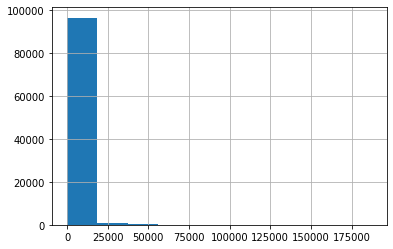

In [ ]:
(df['total_cases']/1000).hist()

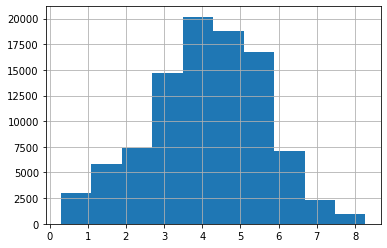

In [ ]:
df['log_total_cases'] = df['total_cases'].apply(np.log10)
df[df['log_total_cases'] > 0]['log_total_cases'].hist()

#10^4 é o pico

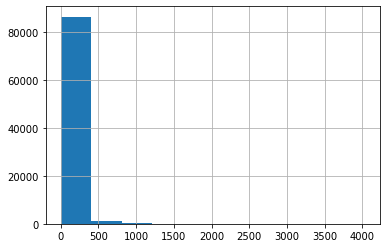

In [ ]:
(df['total_deaths']/1000).hist()

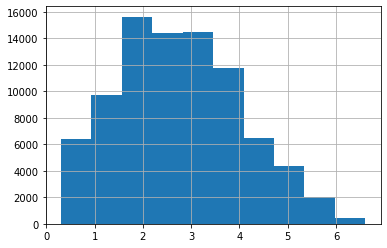

In [ ]:
df['log_total_deaths'] = df['total_deaths'].apply(np.log10)
df[df['log_total_deaths'] > 0]['log_total_deaths'].hist()

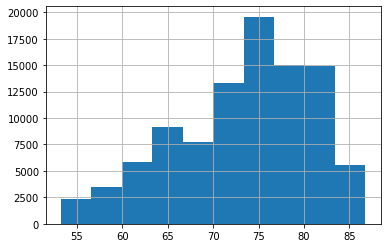

In [ ]:
(df['life_expectancy']).hist()

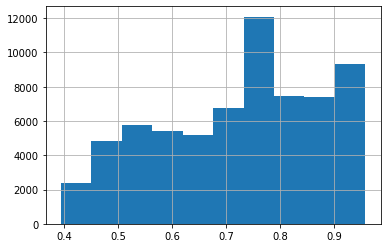

In [ ]:
(df['human_development_index']).hist()

In [ ]:
df['hdi_category'] = 'NaN'
df.loc[(df['human_development_index'] >= 0.8), 'hdi_category'] = 'Desenvolvido'
df.loc[(df['human_development_index'] >= 0.555) & (df['human_development_index'] < 0.8 ), 'hdi_category'] = 'Em Desenvolvimento'
df.loc[(df['human_development_index'] >= 0.350) & (df['human_development_index'] < 0.555 ), 'hdi_category'] = 'Subdesenvolvido'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,hdi_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido


In [ ]:
df['stringency_index'].describe()

df['stringency_category'] = 'NaN'
df.loc[(df['stringency_index'] >= 74), 'stringency_category'] = 'Alta_estringencia'
df.loc[(df['stringency_index'] >= 60) & (df['stringency_index'] < 74 ), 'stringency_category'] = 'Media_estringencia'
df.loc[(df['stringency_index'] >= 20) & (df['stringency_index'] < 60 ), 'stringency_category'] = 'Baixa_estringencia'
df.loc[(df['stringency_index'] < 20 ), 'stringency_category'] = 'Nenhuma_estringencia'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,hdi_category,stringency_category
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,Subdesenvolvido,Nenhuma_estringencia


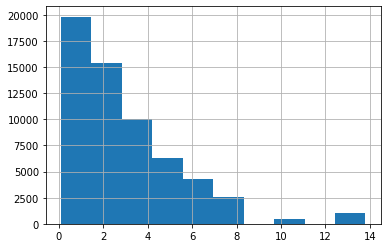

In [ ]:
(df['hospital_beds_per_thousand']).hist()

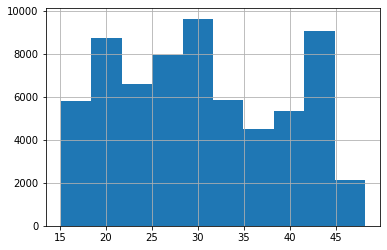

In [ ]:
(df['median_age']).hist()

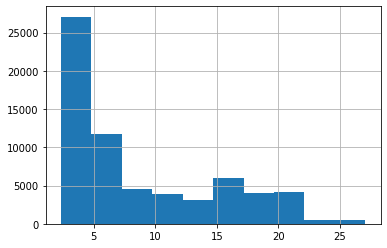

In [ ]:
(df['aged_65_older']).hist()

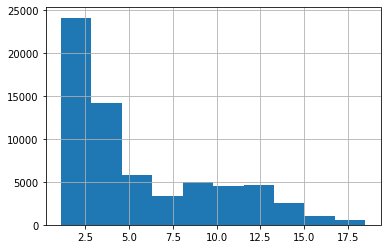

In [ ]:
(df['aged_70_older']).hist()

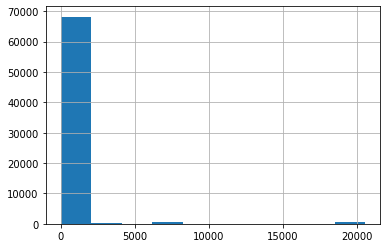

In [ ]:
(df['population_density']).hist()

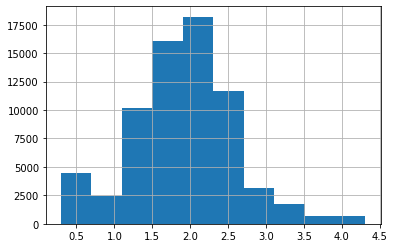

In [ ]:
df['log_population_density'] = df['population_density'].apply(np.log10)
df[df['log_population_density'] > 0]['log_population_density'].hist()

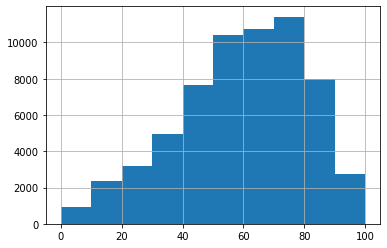

In [ ]:
(df['stringency_index']).hist()

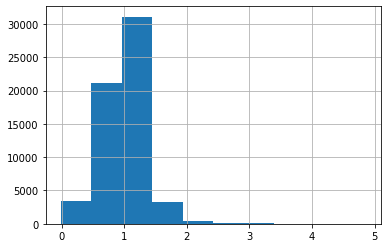

In [ ]:
(df['reproduction_rate']).hist()

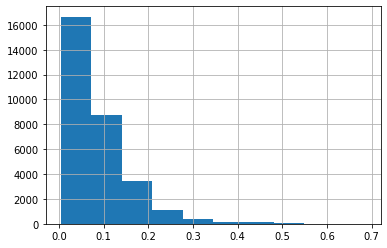

In [ ]:
df['log_reproduction_rate'] = df['reproduction_rate'].apply(np.log10)
df[df['log_reproduction_rate'] > 0]['log_reproduction_rate'].hist()

## Estatísticas univariadas

In [ ]:
print('Mean: ')
print(df[df['location'] == 'Brazil']['total_cases'].mean())

print('Median: ')
print(df[df['location'] == 'Brazil']['total_cases'].median())

print('Mode: ')
print(df[df['location'] == 'Brazil']['total_cases'].median())

Mean: 
6842158.029821074
Median: 
5566049.0
Mode: 
5566049.0


In [ ]:
def est_univ(col_base, val_col_base, col_exp):
  print('Mean: ')
  print(df[df[col_base] == val_col_base][col_exp].mean())

  print('')

  print('Median: ')
  print(df[df[col_base] == val_col_base][col_exp].median())

  print('')

  print('Mode: ')
  print(df[df[col_base] == val_col_base][col_exp].median())

  print('')

  print('Variance: ')
  print(df[df[col_base] == val_col_base][col_exp].var())

  print('')

  print('STD: ')
  print(df[df[col_base] == val_col_base][col_exp].std())

  print('')

  print('Describe: ')
  print(df[df[col_base] == val_col_base][col_exp].describe())

In [ ]:
est_univ('continent', 'South America', 'total_cases')

Mean: 
994673.7546022631

Median: 
133227.0

Mode: 
133227.0

Variance: 
6635247437927.267

STD: 
2575897.404386919

Describe: 
count    5.921000e+03
mean     9.946738e+05
std      2.575897e+06
min      1.000000e+00
25%      6.393000e+03
50%      1.332270e+05
75%      6.851070e+05
max      1.910697e+07
Name: total_cases, dtype: float64


In [ ]:
# Intervalo interquartil
def IQR(df, column):
  return df[column].describe()[6] - df[column].describe()[4]

In [ ]:
IQR(df, 'total_cases')

149526.0

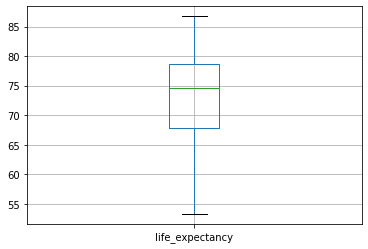

In [ ]:
df.boxplot(column=['life_expectancy'])

In [ ]:
df[df['continent']=='South America'].groupby(['location']).agg(['mean','median'])['total_cases']

,mean,median
location,,
Argentina,1.393110e+06,1228814.0
Bolivia,1.631326e+05,142664.0
Brazil,6.842158e+06,5566049.0
Chile,5.917152e+05,512502.0
Colombia,1.396592e+06,1140167.0
Ecuador,1.893185e+05,171783.0
Falkland Islands,NaN,NaN
Guyana,5.958758e+03,4574.0
Paraguay,1.137562e+05,67768.5


In [ ]:
def compare_mean_median_continent(continent_name, label):
  return df[df['continent']== continent_name].groupby(['location']).agg(['mean','median'])[label]

In [ ]:
compare_mean_median_continent('Asia', 'total_cases')

,mean,median
location,,
Afghanistan,4.263653e+04,41633.0
Armenia,1.050265e+05,99563.0
Azerbaijan,1.345320e+05,60873.0
Bahrain,8.983119e+04,82133.0
Bangladesh,4.066480e+05,421079.5
Bhutan,5.697024e+02,359.0
Brunei,1.678595e+02,148.0
Cambodia,5.439681e+03,285.0
China,8.341227e+04,85711.5


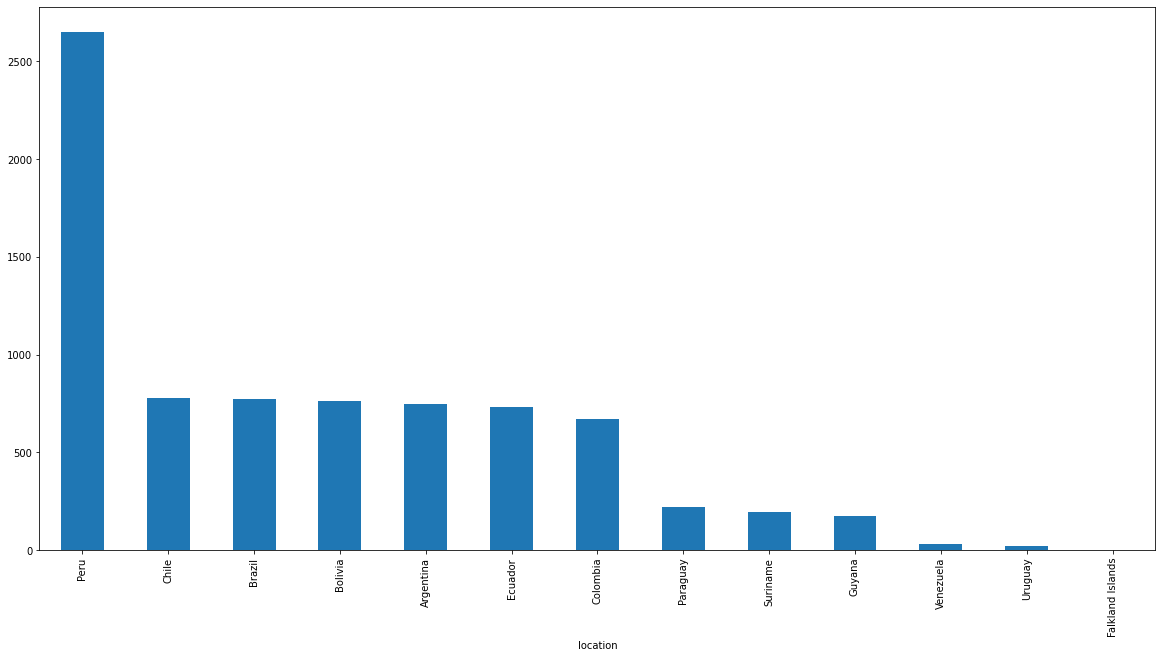

In [ ]:
# Medianas

df[df['continent']=='South America'].groupby(['location'])['total_deaths_per_million'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

## Estatísticas bivariadas

In [ ]:
df.cov()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
total_cases,5.697255e+13,2.359879e+11,2.395816e+11,1.390617e+12,5.201033e+09,4.760204e+09,2.325727e+10,6.283990e+07,6.470341e+07,6.086331e+08,1.579443e+06,1.633837e+06,-1.371825e+04,8.377989e+09,1.506073e+07,2.857229e+10,3.362318e+07,2.840705e+08,4.331827e+06,2.884789e+10,3.423375e+07,3.490712e+11,8.504882e+13,1.736304e+08,5.002928e+05,3.090173e+11,4.622788e+05,-288.060616,-7.191329e+07,2.554426e+15,1.506095e+15,8.324954e+14,4.708539e+13,2.464828e+13,2.974971e+06,-2.262287e+06,-7.638590e+06,1.403283e+09,2.691722e+06,3.310033e+15,-1.808597e+08,2.059147e+06,1.283739e+06,7.796489e+05,2.295359e+09,-5.840109e+06,-3.004058e+07,5.477250e+05,-1.411262e+05,-1.044344e+06,9.572751e+06,-1.323440e+05,1.083889e+06,38066.968641,4.469317e+06
new_cases,2.359879e+11,1.420407e+09,1.402849e+09,5.883896e+09,2.946286e+07,2.599601e+07,6.473006e+07,6.345447e+05,5.631126e+05,1.847167e+06,1.235091e+04,1.094951e+04,1.878698e+02,5.483779e+07,1.547934e+05,1.979233e+08,6.492093e+05,2.216595e+06,4.171581e+04,1.671858e+08,4.998345e+05,2.046233e+09,3.233361e+11,2.337383e+05,2.034951e+03,1.761274e+09,1.677915e+03,134.474118,-4.767074e+05,7.629430e+12,4.333917e+12,2.234623e+12,1.596793e+11,8.238468e+10,-1.931512e+05,-1.419777e+05,-1.218392e+05,-5.677743e+06,2.436451e+04,1.849240e+13,-9.690153e+05,1.035522e+04,6.171131e+03,3.681940e+03,8.262173e+06,-2.981207e+04,-1.546469e+05,2.896751e+03,-2.707749e+03,-5.783186e+03,5.418542e+04,-9.077633e+02,5.244549e+03,185.777909,5.804461e+04
new_cases_smoothed,2.395816e+11,1.402849e+09,1.400722e+09,5.904905e+09,2.895132e+07,2.611062e+07,6.653939e+07,5.628158e+05,5.649565e+05,1.884552e+06,1.161909e+04,1.120439e+04,1.321718e+02,5.530961e+07,1.560765e+05,1.991982e+08,6.550845e+05,2.321211e+06,5.230677e+04,1.994286e+08,6.137343e+05,2.038981e+09,3.283952e+11,2.446799e+05,1.938054e+03,1.781160e+09,1.725600e+03,131.814278,-4.745334e+05,7.729805e+12,4.370712e+12,2.257809e+12,1.602468e+11,8.339922e+10,-1.907450e+05,-1.404732e+05,-1.220633e+05,-5.350258e+06,2.408341e+04,1.855649e+13,-9.729119e+05,1.040102e+04,6.211225e+03,3.706587e+03,8.342202e+06,-2.987732e+04,-1.552323e+05,2.926625e+03,-2.661263e+03,-5.908236e+03,5.428673e+04,-9.077581e+02,5.269607e+03,186.612162,6.021162e+04
total_deaths,1.390617e+12,5.883896e+09,5.904905e+09,3.137116e+10,1.197045e+08,1.204283e+08,5.306643e+08,1.360004e+06,1.399725e+06,1.645873e+07,4.607332e+04,4.722335e+04,-2.521838e+02,1.622568e+08,2.682595e+05,5.699676e+08,7.808726e+05,5.917031e+06,3.635380e+04,5.597977e+08,4.220717e+05,6.181057e+09,1.497370e+12,2.671463e+06,6.137040e+03,5.486619e+09,5.698255e+03,204.873279,-1.648704e+06,5.308747e+13,3.151602e+13,1.757886e+13,9.708184e+11,5.173801e+11,-1.807771e+04,-8.223788e+04,-1.934653e+05,2.713686e+07,5.756309e+04,8.377544e+13,-5.367824e+06,5.017042e+04,3.081707e+04,1.915087e+04,3.675254e+07,-1.661670e+05,-8.579710e+05,1.528376e+04,-9.203546e+0

In [ ]:
df[df.location=='Brazil'].corr(method='pearson')

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
total_cases,1.000000e+00,6.861831e-01,8.446046e-01,9.945353e-01,6.264124e-01,7.687388e-01,1.000000e+00,6.861832e-01,8.446046e-01,9.945353e-01,6.264122e-01,7.687376e-01,-4.912677e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.909522e-01,9.909520e-01,NaN,6.449839e-01,6.448438e-01,NaN,NaN,9.701290e-01,9.612538e-01,9.794608e-01,6.397177e-01,9.106320e-01,9.701286e-01,9.612559e-01,9.794496e-01,9.106348e-01,-1.184393e-01,NaN,-4.449587e-15,NaN,3.694819e-15,-7.001336e-16,4.449587e-15,-7.182147e-15,-5.693805e-15,7.001336e-16,-3.164505e-15,3.497052e-15,NaN,7.461787e-15,-7.001336e-16,4.449587e-15,7.971259e-01
new_cases,6.861831e-01,1.000000e+00,8.202256e-01,6.502744e-01,8.591104e-01,7.110935e-01,6.861831e-01,1.000000e+00,8.202256e-01,6.502744e-01,8.591123e-01,7.110978e-01,-4.980023e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.072123e-01,2.072119e-01,NaN,4.021719e-01,4.026709e-01,NaN,NaN,6.470141e-02,3.885682e-02,7.904713e-03,3.492964e-01,8.676893e-02,6.469059e-02,3.884774e-02,8.006578e-03,8.676341e-02,1.066763e-01,NaN,-3.421611e-15,NaN,-4.703274e-15,1.878353e-15,3.421611e-15,4.591120e-15,-3.778773e-15,-1.878353e-15,-5.121371e-15,2.334967e-15,NaN,-3.232511e-15,1.878353e-15,3.421611e-15,7.800308e-01
new_cases_smoothed,8.446046e-01,8.202256e-01,1.000000e+00,8.245163e-01,7.280436e-01,8.694729e-01,8.446046e-01,8.202256e-01,1.000000e+00,8.245163e-01,7.280433e-01,8.694759e-01,-6.307754e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.329274e-01,6.329280e-01,NaN,6.278155e-01,6.280342e-01,NaN,NaN,2.386670e-01,2.141735e-01,1.112976e-01,3.025669e-01,2.915016e-01,2.386579e-01,2.141872e-01,1.112747e-01,2.914904e-01,4.636713e-02,NaN,-9.556645e-16,NaN,-9.647965e-16,-5.016821e-17,1.116436e-15,-2.720988e-16,-5.016821e-17,-1.036495e-15,-9.647965e-16,1.036495e-15,NaN,-2.774468e-15,1.496911e-15,-5.176817e-16,7.950079e-01
total_deaths,9.945353e-01,6.502744e-01,8.245163e-01,1.000000e+00,6.197324e-01,7.536662e-01,9.945353e-01,6.502745e-01,8.245164e-01,1.000000e+00,6.197322e-01,7.536646e-01,-5.072394e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.842116e-01,9.842114e-01,NaN,6.677565e-01,6.676835e-01,NaN,NaN,9.721714e-01,9.606079e-01,9.825432e-01,6.345553e-01,9.076770e-01,9.721714e-01,9.606083e-01,9.825307e-01,9.076805e-01,-5.927827e-01,NaN,-4.539512e-15,NaN,3.864128e-16,6.526661e-15,1.764748e-15,-4.407743e-15,2.250703e-15,8.239549e-15,4.363371e-15,2.671621e-15,NaN,8.239549e-15,-2.250703e-15,-2.537958e-15,7.753398e-01
new_deaths,6.264124e-01,8.591104e-01,7.280436e-01,6.197324e-01,1.000000e+00,8.436478e-01,6.264124e-01,8.591104e-01,7.280435e-01,6.197324e-01,1.000000e+00,8.436503e-01,-3.901546e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.150923e-02,-1.150609e-02,NaN,3.344644e-01,3.348282e-01,NaN,NaN,9.668517e-02,8.514652e-02,-3.820489e-02,4.219971e-01,2.042110e-01,9.667242e-02,8.513308e-02,-3.815864e-02,2.042139e-01,-1.097593e-01,NaN,-2.477708e-15,NaN,3.224846e-15,-2.33718

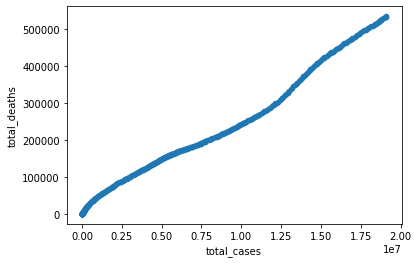

In [ ]:
df[df.location=='Brazil'].plot.scatter(x='total_cases',y='total_deaths')

# **Testes de hipótese**

In [ ]:
# Transformar a coluna date no tipo data
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Primeiro ano de pandemia

casos_brasil_inicio = df.loc[(df['date'].dt.year == 2020) & (df['date'].dt.month >= 2)]

casos_brasil_inicio[casos_brasil_inicio.location=='Brazil']

In [ ]:
# Segundo ano de pandemia

casos_brasil_depois = df.loc[(df['date'].dt.year == 2021)]

casos_brasil_depois[casos_brasil_depois.location=="Brazil"]

In [ ]:
casos_brasil_inicio['new_deaths_per_million'].describe()

count    50912.000000
mean         1.187499
std          3.650824
min        -76.445000
25%          0.000000
50%          0.079000
75%          0.848000
max        218.329000
Name: new_deaths_per_million, dtype: float64

In [ ]:
casos_brasil_depois['new_deaths_per_million'].describe()

count    36654.000000
mean         2.045155
std          4.286819
min        -20.593000
25%          0.000000
50%          0.271000
75%          2.198500
max        104.885000
Name: new_deaths_per_million, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


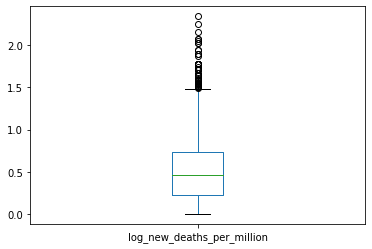

In [ ]:
casos_brasil_inicio['log_new_deaths_per_million'] = casos_brasil_inicio['new_deaths_per_million'].apply(np.log10)
casos_brasil_inicio[casos_brasil_inicio['log_new_deaths_per_million'] > 0]['log_new_deaths_per_million'].plot(kind='box')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


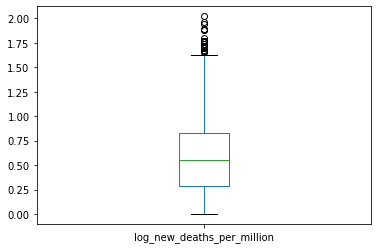

In [ ]:
casos_brasil_depois['log_new_deaths_per_million'] = casos_brasil_depois['new_deaths_per_million'].apply(np.log10)
casos_brasil_depois[casos_brasil_depois['log_new_deaths_per_million'] > 0]['log_new_deaths_per_million'].plot(kind='box')

In [107]:
strin_brasil_Hi = df.loc[(df['stringency_category'] == 'Alta_estringencia') | (df['stringency_category'] == 'Media_estringencia')]

strin_brasil_Hi = strin_brasil_Hi[strin_brasil_Hi.location=="Brazil"]

In [ ]:
strin_brasil_Lo = df.loc[(df['stringency_category'] == 'Baixa_estringencia') | (df['stringency_category'] == 'Nenhum_estringencia')]

strin_brasil_Lo = strin_brasil_Lo[strin_brasil_Lo.location=="Brazil"]

In [111]:
strin_brasil_Lo['reproduction_rate'].describe()

count    54.000000
mean      1.177963
std       0.393889
min       0.970000
25%       1.002500
50%       1.080000
75%       1.150000
max       2.630000
Name: reproduction_rate, dtype: float64

In [112]:
strin_brasil_Hi['reproduction_rate'].describe()

count    411.000000
mean       1.142506
std        0.294531
min        0.900000
25%        0.990000
50%        1.040000
75%        1.130000
max        2.690000
Name: reproduction_rate, dtype: float64

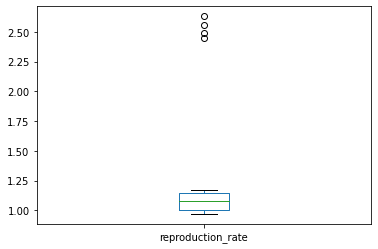

In [113]:
strin_brasil_Lo['reproduction_rate'].plot(kind='box')

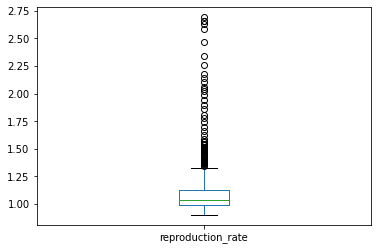

In [114]:
strin_brasil_Hi['reproduction_rate'].plot(kind='box')

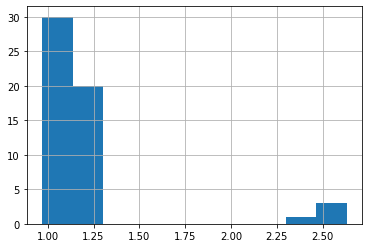

In [120]:
strin_brasil_Lo['reproduction_rate'].dropna().hist()

In [125]:
stats.jarque_bera(strin_brasil_Lo['reproduction_rate'].dropna())

(227.05336634108215, 0.0)

In [126]:
stats.shapiro(strin_brasil_Lo['reproduction_rate'].dropna())

(0.4544994831085205, 7.132766599582396e-13)

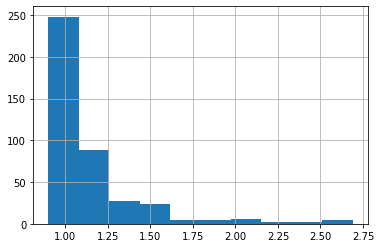

In [127]:
strin_brasil_Hi['reproduction_rate'].dropna().hist()

In [128]:
stats.shapiro(strin_brasil_Hi['reproduction_rate'].dropna())

(0.6254245042800903, 6.088563907519108e-29)

In [134]:
stats.mannwhitneyu(strin_brasil_Lo['reproduction_rate'], strin_brasil_Hi['reproduction_rate'])

MannwhitneyuResult(statistic=9681.5, pvalue=0.02687688591991949)

# **Análise exploratória dos dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101998 entries, 0 to 101997
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   iso_code                               101998 non-null  object        
 1   continent                              97230 non-null   object        
 2   location                               101998 non-null  object        
 3   date                                   101998 non-null  datetime64[ns]
 4   total_cases                            98192 non-null   float64       
 5   new_cases                              98189 non-null   float64       
 6   new_cases_smoothed                     97179 non-null   float64       
 7   total_deaths                           87983 non-null   float64       
 8   new_deaths                             88139 non-null   float64       
 9   new_deaths_smoothed                    97179 non

In [ ]:
df['iso_code'] = df['iso_code'].astype('category')
df['continent'] = df['continent'].astype('category')
df['location'] = df['location'].astype('category')
df['date'] = df['date'].astype('category')
df['tests_units'] = df['tests_units'].astype('category')

In [ ]:
df.dtypes

iso_code                                 category
continent                                category
location                                 category
date                                     category
total_cases                               float64
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
reproduction_rate                         float64
icu_patients                              float64
icu_patients_per_million                  float64
hosp_patients                             float64


In [ ]:
df['continent'].cat.categories

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [ ]:
df['iso_code'].cat.categories

Index(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATG',
       ...
       'VEN', 'VGB', 'VNM', 'VUT', 'WLF', 'WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', length=231)

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
101993,ZWE,Africa,Zimbabwe,2021-07-08,62383.0,2156.0,1594.571,2029.0,56.0,31.571,4197.222,145.059,107.285,136.514,3.768,2.124,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12811.0,720873.0,48.501,0.862,8053.0,0.542,0.198,5.1,tests performed,1433578.0,848808.0,584770.0,34821.0,13088.0,9.65,5.71,3.93,881.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101994,ZWE,Africa,Zimbabwe,2021-07-09,65066.0,2683.0,1771.857,2084.0,55.0,34.714,4377.738,180.516,119.213,140.215,3.700,2.336,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1464065.0,875182.0,588883.0,30487.0,15907.0,9.85,5.89,3.96,1070.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101995,ZWE,Africa,Zimbabwe,2021-07-10,66853.0,1787.0,1884.000,2126.0,42.0,38.143,4497.970,120.232,126.758,143.040,2.826,2.566,1.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16878.0,NaN,NaN,NaN,1136.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101996,ZWE,Africa,Zimbabwe,2021-07-11,67765.0,912.0,1898.714,2185.0,59.0,43.857,4559.331,61.361,127.748,147.010,3.970,2.951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101997,ZWE,Africa,Zimbabwe,2021-07-12,70426.0,2661.0,2058.857,2236.0,51.0,46.429,4738.367,179.036,138.523,150.441,3.431,3.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,53.7,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [ ]:
df.shape

(101998, 60)

In [ ]:
df.isnull().sum()

iso_code                                      0
continent                                  4768
location                                      0
date                                          0
total_cases                                3806
new_cases                                  3809
new_cases_smoothed                         4819
total_deaths                              14015
new_deaths                                13859
new_deaths_smoothed                        4819
total_cases_per_million                    4328
new_cases_per_million                      4331
new_cases_smoothed_per_million             5336
total_deaths_per_million                  14524
new_deaths_per_million                    14368
new_deaths_smoothed_per_million            5336
reproduction_rate                         19771
icu_patients                              91741
icu_patients_per_million                  91741
hosp_patients                             89262
hosp_patients_per_million               

# **Pré processamento**

Excluir as seguintes colunas, pois possuem de 80 à 90 porcento de seus dados ausentes.

In [ ]:
df = df.drop(columns=['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 
                      'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million'])

In [ ]:
# Exluir do dataset colunasc que possuem ao menos 70% dos dados ausentes
df = df.dropna(thresh=0.7*len(df), axis=1)

In [ ]:
df.isnull().sum()

iso_code                               0
continent                           4768
location                               0
date                                   0
total_cases                         3806
new_cases                           3809
new_cases_smoothed                  4819
total_deaths                       14015
new_deaths                         13859
new_deaths_smoothed                 4819
total_cases_per_million             4328
new_cases_per_million               4331
new_cases_smoothed_per_million      5336
total_deaths_per_million           14524
new_deaths_per_million             14368
new_deaths_smoothed_per_million     5336
reproduction_rate                  19771
stringency_index                   16437
population                           656
population_density                  7263
median_age                         10944
aged_65_older                      11966
aged_70_older                      11447
gdp_per_capita                     10575
cardiovasc_death

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511


In [ ]:
print(df['total_cases'].mean())
print(df['total_cases'].median())

1105662.5528963662
14093.0
